In [1]:
# Read the NBA data into a DataFrame.
import pandas as pd
import numpy as np

path = 'data/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)

In [2]:
# Map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [3]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [4]:
# Create response vector (y).
y = nba.pos_num

In [5]:
print(X.shape)
print(y.shape)
X.head()

(478, 5)
(478,)


,ast,stl,blk,tov,pf
season_end,,,,,
2015,1.0,0.4,0.3,0.9,2.2
2015,0.4,0.4,0.3,0.4,0.8
2015,1.0,0.4,1.2,1.6,3.0
2015,0.9,0.2,0.5,0.5,1.8
2015,1.9,0.6,0.1,1.6,2.1


<a id="using-the-traintest-split-procedure-k"></a>
### Using the Train/Test Split Procedure (K=1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6166666666666667


In [10]:
knn.score(X_test,y_test)

0.6166666666666667

In [11]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.675


In [12]:
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

1    150
2    140
0     68
Name: pos_num, dtype: int64


1

In [13]:
y_test.value_counts()[most_freq_class] / len(y_test)

0.4083333333333333

In [14]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with data.
knn.fit(X, y)

# Store the predicted response values.
y_pred_class = knn.predict(X)

In [15]:
# Calculate predicted probabilities of class membership.
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.
knn.predict_proba(X)

array([[0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [0.8, 0.2, 0. ],
       ...,
       [0. , 0.6, 0.4],
       [0.6, 0.4, 0. ],
       [0.6, 0.4, 0. ]])

In [16]:
# How can we use these predictions?
# Calculate predicted probabilities of class membership.
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.

preds = pd.DataFrame(knn.predict_proba(X))
X_withpreds = pd.concat([X.reset_index(), preds.reset_index()], axis=1)
X_withpreds.head()

,season_end,ast,stl,blk,tov,pf,index,0,1,2
0,2015,1.0,0.4,0.3,0.9,2.2,0,0.0,0.6,0.4
1,2015,0.4,0.4,0.3,0.4,0.8,1,0.0,0.8,0.2
2,2015,1.0,0.4,1.2,1.6,3.0,2,0.8,0.2,0.0
3,2015,0.9,0.2,0.5,0.5,1.8,3,0.2,0.6,0.2
4,2015,1.9,0.6,0.1,1.6,2.1,4,0.0,0.4,0.6


In [17]:
#Show the predicted class
preds = pd.DataFrame(knn.predict(X), columns=['pos'])
X_withpreds = pd.concat([X.reset_index(), preds.reset_index()], axis=1)
X_withpreds.head()

,season_end,ast,stl,blk,tov,pf,index,pos
0,2015,1.0,0.4,0.3,0.9,2.2,0,1
1,2015,0.4,0.4,0.3,0.4,0.8,1,1
2,2015,1.0,0.4,1.2,1.6,3.0,2,0
3,2015,0.9,0.2,0.5,0.5,1.8,3,1
4,2015,1.9,0.6,0.1,1.6,2.1,4,2


In [18]:
scores = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

In [19]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [20]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [21]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

In [22]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

,training error,testing error
K,,
1,0.096234,0.383333
2,0.267782,0.450000
3,0.225941,0.366667
4,0.263598,0.383333
5,0.282427,0.325000


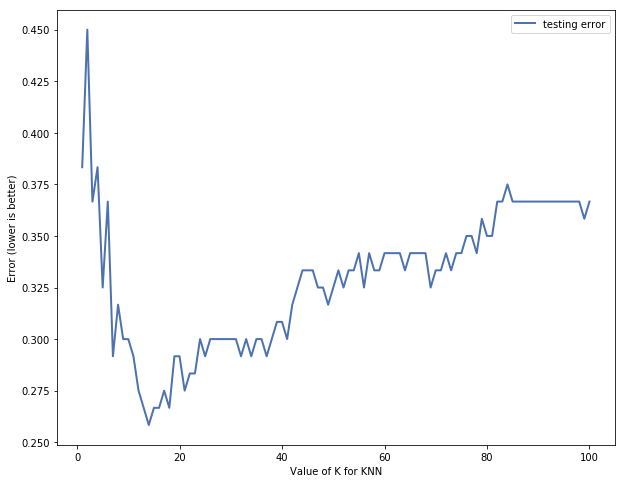

In [23]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error', linewidth=2, figsize=(10, 8));
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [24]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,training error,testing error
K,,
14,0.299163,0.258333
13,0.307531,0.266667
18,0.307531,0.266667
16,0.299163,0.266667
15,0.309623,0.266667


In [25]:
# Alternative method:
min(list(zip(testing_error, k_range)))

(0.2583333333333333, 14)

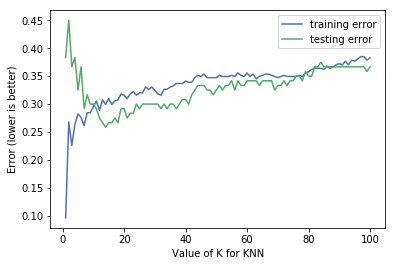

In [26]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [27]:
#import numpy as np

# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=14)

# Re-train the model with X and y (not X_train and y_train). Why?
knn.fit(X, y)

# Make a prediction for an out-of-sample observation.
knn.predict(np.array([2, 1, 0, 1, 2]).reshape(1, -1))


array([2])

In [28]:
#What's the probability of that prediction?
np.amax(knn.predict_proba(np.array([2, 1, 0, 1, 2]).reshape(1, -1)))


0.7857142857142857

In [29]:
min(list(zip(testing_error, k_range)))

(0.2583333333333333, 14)

In [30]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [31]:

# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba[feature_cols]
y = nba.pos_num  # Create response vector (y).

In [32]:

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# Capture our cross validation scores
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.66666667 0.66666667 0.77083333 0.5        0.66666667 0.77083333
 0.6875     0.5625     0.60416667 0.67391304]


#### We use average accuracy as an estimate of out-of-sample accuracy

In [33]:
# What kind of object is scores?
type(scores)

numpy.ndarray

In [34]:
# It's a numpy array! We know those! Let's calculate the mean to give us an estimate of out-of-sample accuracy
print(scores.mean())

0.6569746376811595


#### Good - well to understand where we're going we have to understand where we've been. Let's run through this quickly the old way

In the below we'll capture the accuaracy of k from 1 to 30. To do so we'll
- establish a range to pass to k
- Create a list to hold our scores
- Design a for loop to do the heavy lifting for us
- Look at our scores


In [35]:
# list of integers 1 to 30
k_range = range(1, 31)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6047101449275363, 0.6109601449275361, 0.6278079710144927, 0.6423913043478261, 0.6569746376811595, 0.661141304347826, 0.6714673913043478, 0.6693840579710144, 0.6653079710144928, 0.6819746376811594, 0.6736413043478261, 0.6673913043478261, 0.667391304347826, 0.6738224637681159, 0.6528079710144927, 0.661141304347826, 0.6528985507246376, 0.6652173913043479, 0.6737318840579711, 0.6653079710144928, 0.6568840579710146, 0.6631340579710144, 0.667481884057971, 0.6673913043478261, 0.6717391304347826, 0.6694746376811593, 0.6632246376811594, 0.6633152173913043, 0.6528985507246376, 0.6549818840579709]


In [36]:
k_dict=dict(zip(k_range,k_scores))
k_dict

{1: 0.6047101449275363,
 2: 0.6109601449275361,
 3: 0.6278079710144927,
 4: 0.6423913043478261,
 5: 0.6569746376811595,
 6: 0.661141304347826,
 7: 0.6714673913043478,
 8: 0.6693840579710144,
 9: 0.6653079710144928,
 10: 0.6819746376811594,
 11: 0.6736413043478261,
 12: 0.6673913043478261,
 13: 0.667391304347826,
 14: 0.6738224637681159,
 15: 0.6528079710144927,
 16: 0.661141304347826,
 17: 0.6528985507246376,
 18: 0.6652173913043479,
 19: 0.6737318840579711,
 20: 0.6653079710144928,
 21: 0.6568840579710146,
 22: 0.6631340579710144,
 23: 0.667481884057971,
 24: 0.6673913043478261,
 25: 0.6717391304347826,
 26: 0.6694746376811593,
 27: 0.6632246376811594,
 28: 0.6633152173913043,
 29: 0.6528985507246376,
 30: 0.6549818840579709}

In [37]:
# What value of k gave us our highest score?
max(k_dict, key= k_dict.get)

10

Text(0, 0.5, 'Cross-Validated Accuracy')

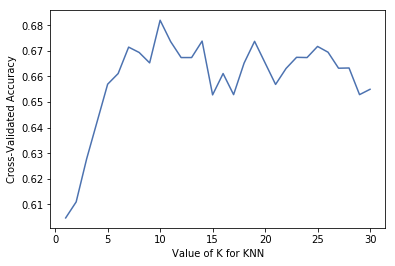

In [38]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [39]:
# We have our k_range let's use that to build a parameter grid

param_grid=dict(n_neighbors=list(k_range))
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [40]:
# instantiate a GridSearch object - here a classifier (clf)
clf = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)

In [41]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [42]:
clf.fit(X,y)

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [43]:
# Want to know everything about what we just tested?
clf.cv_results_

{'mean_fit_time': array([0.00142198, 0.00133471, 0.00136905, 0.00140045, 0.00144949,
        0.00134559, 0.0013402 , 0.00139356, 0.00120273, 0.0011199 ,
        0.00106893, 0.00126278, 0.0011791 , 0.00119193, 0.00124481,
        0.00122459, 0.0013104 , 0.00146854, 0.00144262, 0.00138772,
        0.00145328, 0.00150783, 0.00137839, 0.00131719, 0.00120804,
        0.00138757, 0.00152578, 0.00135338, 0.0014286 , 0.00150459]),
 'std_fit_time': array([1.25834236e-04, 7.46911642e-05, 7.77056443e-05, 1.11254828e-04,
        2.31520061e-04, 7.32851399e-05, 1.00233496e-04, 2.00731765e-04,
        6.30017385e-05, 9.23578800e-05, 8.27765959e-05, 1.40333275e-04,
        5.17133416e-05, 7.23184548e-05, 1.95188282e-04, 7.36552170e-05,
        1.27052936e-04, 3.45871841e-04, 9.88185505e-05, 1.16284553e-04,
        1.28012051e-04, 2.37341428e-04, 1.77335964e-04, 2.82009696e-04,
        8.17269156e-05, 2.42133370e-04, 2.37829774e-04, 2.89535531e-04,
        1.56635636e-04, 1.50071648e-04]),
 'mean_scor

In [44]:
# You can slice by the key/value pairs you want to make this a little easier to understand

list(zip(clf.cv_results_['mean_test_score'],clf.cv_results_['params']))

[(0.604602510460251, {'n_neighbors': 1}),
 (0.6108786610878661, {'n_neighbors': 2}),
 (0.6276150627615062, {'n_neighbors': 3}),
 (0.6422594142259415, {'n_neighbors': 4}),
 (0.6569037656903766, {'n_neighbors': 5}),
 (0.6610878661087866, {'n_neighbors': 6}),
 (0.6715481171548117, {'n_neighbors': 7}),
 (0.6694560669456067, {'n_neighbors': 8}),
 (0.6652719665271967, {'n_neighbors': 9}),
 (0.6820083682008368, {'n_neighbors': 10}),
 (0.6736401673640168, {'n_neighbors': 11}),
 (0.6673640167364017, {'n_neighbors': 12}),
 (0.6673640167364017, {'n_neighbors': 13}),
 (0.6736401673640168, {'n_neighbors': 14}),
 (0.6527196652719666, {'n_neighbors': 15}),
 (0.6610878661087866, {'n_neighbors': 16}),
 (0.6527196652719666, {'n_neighbors': 17}),
 (0.6652719665271967, {'n_neighbors': 18}),
 (0.6736401673640168, {'n_neighbors': 19}),
 (0.6652719665271967, {'n_neighbors': 20}),
 (0.6569037656903766, {'n_neighbors': 21}),
 (0.6631799163179917, {'n_neighbors': 22}),
 (0.6673640167364017, {'n_neighbors': 23})

In [45]:
# We can find ways to make this easier on ourselves
knn_score=list(zip(clf.cv_results_['mean_test_score'],clf.cv_results_['params']))

sorted(knn_score,key=lambda x: x[0],reverse=True)[0]

(0.6820083682008368, {'n_neighbors': 10})

In [46]:
# You can also skip to the end
print(clf.best_score_)
print(clf.best_params_)
knn=clf.best_estimator_

0.6820083682008368
{'n_neighbors': 10}


Text(0, 0.5, 'Cross-Validated Accuracy')

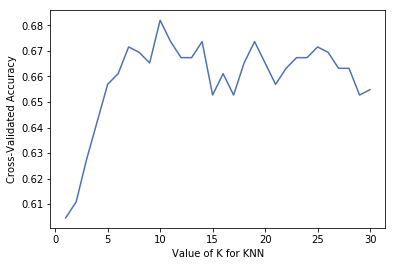

In [47]:
# plot the results
# this is identical to the one we generated above
mean_scores=clf.cv_results_['mean_test_score'].tolist()
plt.plot(k_range, mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Use `StandardScaler` to Standardize our Data


In [48]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba[feature_cols]
y = nba.pos_num  # Create response vector (y).

#### Create the train/test split.

Notice that we create the train/test split first. This is because we will reveal information about our testing data if we standardize right away.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Instantiate and fit `StandardScaler`.

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Let's investigate what we did
pd.DataFrame(X_train).describe()

,0,1,2,3,4
count,3.580000e+02,3.580000e+02,3.580000e+02,3.580000e+02,3.580000e+02
mean,2.977134e-17,1.628120e-17,2.356898e-17,-1.690144e-16,2.459237e-16
std,1.001400e+00,1.001400e+00,1.001400e+00,1.001400e+00,1.001400e+00
min,-9.985280e-01,-1.470964e+00,-8.774583e-01,-1.477139e+00,-2.400753e+00
25%,-6.616071e-01,-7.870613e-01,-6.667742e-01,-7.015598e-01,-7.428789e-01
50%,-3.246863e-01,-1.031585e-01,-2.454058e-01,-1.845070e-01,-5.209800e-02
75%,2.930019e-01,5.807442e-01,1.759625e-01,4.618090e-01,6.386829e-01
max,4.729126e+00,3.544323e+00,5.021698e+00,4.081179e+00,3.263650e+00


In [52]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.2583333333333333
